In [84]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import graphviz
from scipy.ndimage import imread
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [162]:
df = pd.read_excel('Synthetic dataset.xls', encoding='cp1251')

In [163]:
df.head()

,Итог,Количество,Признак0,Признак1,Признак2,Признак3,Признак4,Признак5
0,Итог0,12,0,0,1,0,0,1
1,Итог4,11,0,0,1,1,1,1
2,Итог1,98,0,1,0,0,1,1
3,Итог0,51,0,0,1,1,1,1
4,Итог3,36,1,0,0,0,1,0


Добавим в датафрейм строки пропорционально количеству

In [165]:
for row, cnt in zip(df.itertuples(), df['Количество'].values):
    if cnt > 1:
        df_a = pd.DataFrame([row] * (cnt - 1))
        #df_a.reset_index()
        #df.append([row] * (cnt - 1), ignore_index=True)
        df = pd.concat([df, df_a])
    else:
        pass
    #print(row)

Заменим названия итогов на метки от 0 до $n_{classes} - 1$

In [166]:
class_names = df['Итог'].unique()
class_map = {t:i for i, t in enumerate(class_names)}
df['Итог'].replace(class_map, inplace=True)

In [167]:
df.head()

,Index,Итог,Количество,Признак0,Признак1,Признак2,Признак3,Признак4,Признак5
0,NaN,0,12,0,0,1,0,0,1
1,NaN,1,11,0,0,1,1,1,1
2,NaN,2,98,0,1,0,0,1,1
3,NaN,0,51,0,0,1,1,1,1
4,NaN,3,36,1,0,0,0,1,0


In [168]:
y = df['Итог']
X = df.drop(labels=['Итог', 'Index', 'Количество'], axis=1)

In [172]:
clf = DecisionTreeClassifier(min_samples_leaf=0.05)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.05, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Экспортируем дерево в формат graphviz и отрендерим картинку

In [173]:
gv = export_graphviz(clf, out_file='decision_tree.gv', 
                     filled=True, feature_names=X.columns.values, 
                     class_names=class_names,
                    impurity=False,
                    label='root')
graphviz.render(filepath='decision_tree.gv', engine='dot', format='png')
im = plt.imread('decision_tree.gv.png')

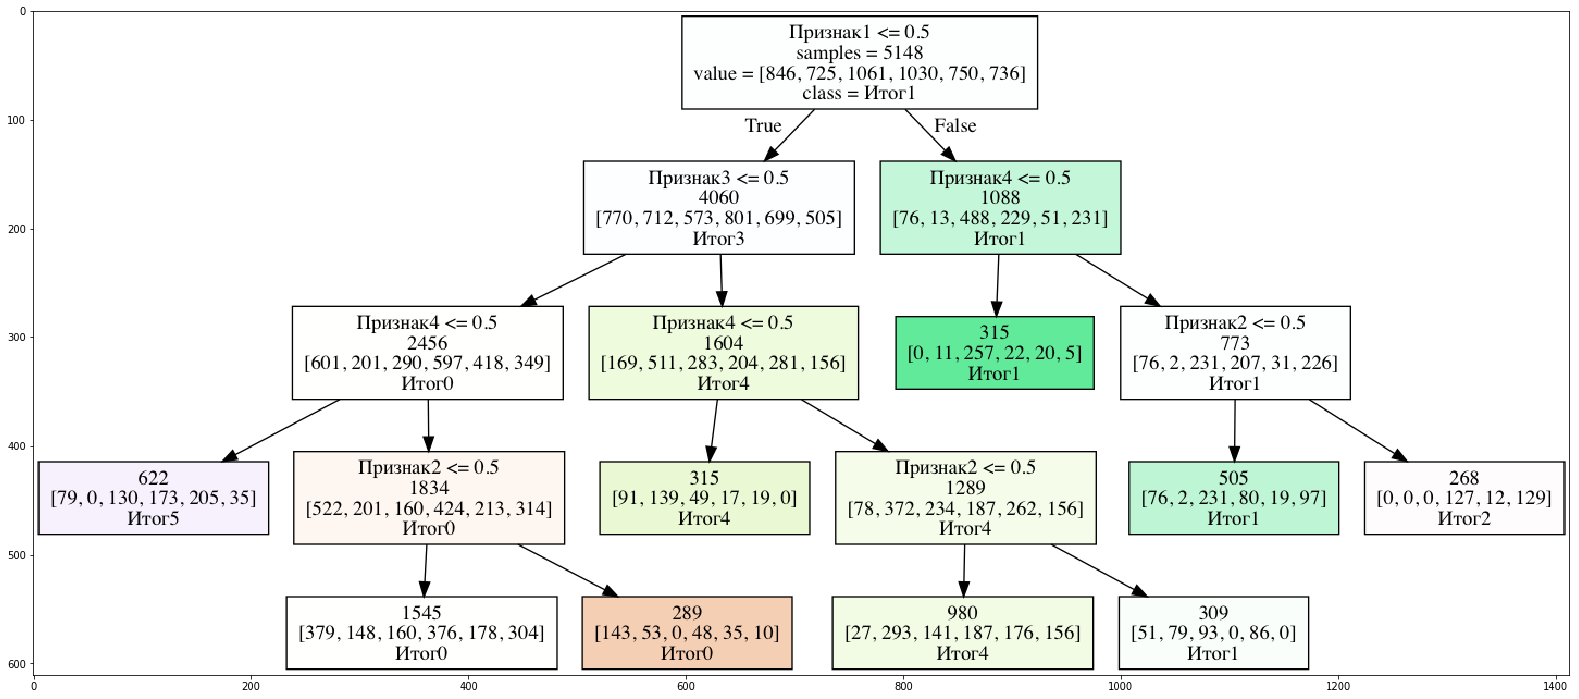

In [176]:
width = im.shape[1] / 50
height = im.shape[0] / 50
plt.figure(figsize=(width, height))
plt.imshow(im)

In [158]:
unique_vals = {}
for c in X.columns.values:
    unique_vals[c] = np.sort(X[c].unique())

In [159]:
unique_vals

{'Признак0': array([0, 1]),
 'Признак1': array([0, 1]),
 'Признак2': array([0, 1]),
 'Признак3': array([0, 1]),
 'Признак4': array([0, 1]),
 'Признак5': array([0, 1])}

In [160]:
with open('decision_tree.gv', 'r') as f:
    s = f.readlines()

In [161]:
len(s)

24